In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

In [2]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                # if(args[file]["adaptive_n"]):
    
                #     continue
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        # print(file_path)
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


100%|██████████| 3801/3801 [00:01<00:00, 3414.88it/s]


In [3]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
print(args.keys())
for key in times:
    if(args[key]["adaptive_n"]):
        counter += 1
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

1628
1628
1900
dict_keys(['1717002758.385562.log', '1716961442.7921338.log', '1716994532.8477712.log', '1717028927.3599632.log', '1717018242.4510174.log', '1716983893.7289534.log', '1717016021.875508.log', '1716957724.3025916.log', '1717022565.639833.log', '1717001012.5913134.log', '1716972963.9635668.log', '1716968526.8429973.log', '1716966603.8329895.log', '1716964203.008805.log', '1717035720.8826985.log', '1716992850.4228075.log', '1716999392.182275.log', '1716986154.0133693.log', '1717006478.1166918.log', '1717025446.5870667.log', '1716959282.9229743.log', '1716981920.401511.log', '1716953735.1442232.log', '1716954406.8258717.log', '1716977292.2467976.log', '1716979997.3899813.log', '1716975857.8129008.log', '1717012719.9209547.log', '1717018242.4378557.log', '1716952952.1171696.log', '1716979996.6853874.log', '1716990806.4141638.log', '1716966603.9003212.log', '1716961443.2225046.log', '1717016021.6388385.log', '1717021124.1252937.log', '1716997832.1347978.log', '1716977292.229921

49


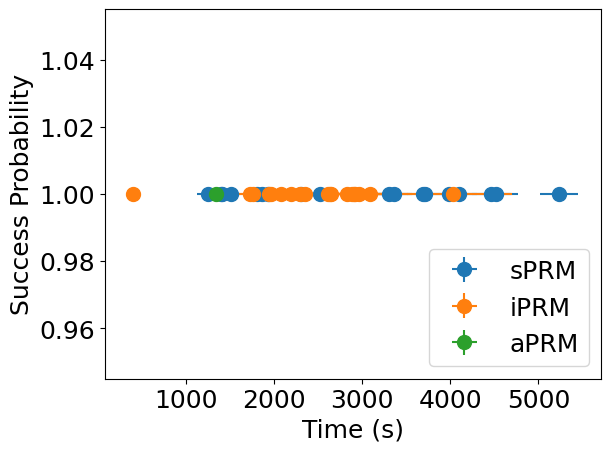

In [4]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('../../../figures/sample_plot.pdf', format='pdf',  bbox_inches='tight')